<a href="https://colab.research.google.com/github/vnkn17/AM216_Work/blob/master/Copy_of_disease_dynamics_fixed_targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from graph_nets import modules
import sonnet as snt
from graph_nets import blocks
from graph_nets import utils_tf

import pandas as pd

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from graph_nets import blocks
from graph_nets import graphs
from graph_nets import modules
from graph_nets import utils_np
from graph_nets import utils_tf

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sonnet as snt
import tensorflow as tf


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
# Simulation Code:
## Simulation Model: 


In [0]:
healthy_time_series_2 = 'https://raw.githubusercontent.com/vnkn17/Final_Project_AM216/master/Test_Datasets/Healthy/healthy_time_series_1.txt'
sick_time_series = 'https://raw.githubusercontent.com/vnkn17/Final_Project_AM216/master/Test_Datasets/Sick/sick_time_series.txt'
#healthy_time_series_1 = pd.read_csv(dataset_1, header = None, sep = '\t')


In [0]:
healthy_time_series_1

,0,1,2,3,4,5,6,7,8,9
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,995,999,999,999,999,998,998,999,997,998
2,991,995,995,994,994,993,993,994,989,991
3,982,985,985,982,981,978,979,981,969,972
4,960,959,959,951,946,941,943,945,918,924
5,904,893,895,873,859,850,854,855,796,808
6,771,742,748,697,667,653,660,659,550,570
7,512,461,473,392,352,337,345,344,217,239
8,186,144,156,97,76,71,74,77,25,31
9,18,10,13,4,3,2,3,3,0,0


In [0]:
from google.colab import files
files.upload()



{}

### Import Data

In [0]:

#healthy_time_series_2 = pd.read_csv('healthy_time_series.txt', header = None, sep = '\t')
#sick_time_series = pd.read_csv('sick_time_series.txt', header = None, sep = '\t')

In [0]:
# Train Edges
# Train Senders
# Train Receivers

## Assume that you have a bunch of cities that are at most 1000 miles apart each other, and which each have populations between 1 and 10,000,000.
graph_dicts = []
num_nodes = 10
from random import randint
num_edges =  num_nodes * num_nodes
GLOBAL_SIZE = 2
EDGE_SIZE = 100
MAX_POPULATION = 10000000
MAX_DISTANCE = 1000






In [0]:

# 1)  Assume that there are three Global Variables, and the values for these are randomly determined.

# 2) Assume that edge weights are randomly determined once you have the nodes, as are senders and receivers

# 3) Assume that we have a graph of nodes at 1000 time steps.

# 4) Assume that 
def get_sick_graph_data_dict(healthy_data, sick_data,num_nodes, num_edges):
   """Create dictionary for a single graph from node data"""

   return {      
  "globals": np.random.rand(GLOBAL_SIZE).astype(np.float32),
   "nodes": np.array([healthy_data, sick_data]).T.astype(np.float32),
   #"edges": np.random.rand(num_edges, EDGE_SIZE).astype(np.float32),
   "edges": np.random.uniform(num_edges, EDGE_SIZE).astype(np.float32),
   "senders": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
   "receivers": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
  }

# This involes getting data for many different timesteps.

# Suppose you have an array with a bunch of Populations
# This generates random Distances between the Nodes
# Simplest ex
def get_edge_weights(populations, distances):
  senders = []
  receivers = []
  edges = []
  ctr = 0
  # Assume that the edge weight formula is some combination of Population, specific edgeweight
  for k in range(len(populations)):
    for l in range(k+1, len(populations)):
      distance = distances[ctr]
      senders.append(k)
      receivers.append(l)
      population_1 = populations[k]
      population_2 = populations[l]
      edges.append((population_1 + population_2)/(2 * MAX_POPULATION) * distances[ctr] / MAX_DISTANCE)
      ctr = ctr + 1
  return senders, receivers, edges
# This involves building a graph consisting of Num_Dicts Timesteps
def get_train_graph_data_dicts(num_dicts):
  # Node 1 Data 
  return 1
   
   
   
    
# This involves only getting data for timestep 1 - and predicting the rest. 
def get_initial_data():
  healthy_values = np.random.randint(100, size = num_nodes).astype(np.float32)
  populations = np.random.randint(MAX_POPULATION, size = num_nodes).astype(np.float32)
  print(EDGE_SIZE)
  distances = np.random.randint(MAX_DISTANCE, size = EDGE_SIZE).astype(np.float32)
  print(len(distances))
  senders, receivers, edges = get_edge_weights(populations, distances)
  return healthy_values, populations, senders, receivers, edges

  
  
  
  


In [0]:
def get_test_graph_data_dicts():
  return {      
  "globals": np.random.rand(GLOBAL_SIZE).astype(np.float32),
   "nodes": np.array([healthy_values, populations]).T.astype(np.float32),
   #"edges": np.random.rand(num_edges, EDGE_SIZE).astype(np.float32),
     
   "edges":  np.array([edges]).T.astype(np.float32),
   "senders": senders,
   "receivers": receivers,
  }

In [65]:
len(np.array([edges])

SyntaxError: ignored

In [59]:
 healthy_values, populations, senders, receivers, edges = get_initial_data()
 print(edges)
 print(healthy_values)
 print(senders)
 print(receivers)

100
100
[0.2551211026, 0.5960471573000001, 0.2788181424, 0.3338909873, 0.3620739902, 0.44460521999999997, 0.48716152189999995, 0.19541149605000002, 0.3863547718, 0.6194626306000001, 0.03166004, 0.2815785504, 0.2867198175, 0.5279768658, 0.32822840324999997, 0.64456152165, 0.27337115354999997, 0.3292896816, 0.04022439345, 0.16132843070000003, 0.57199571, 0.1164210684, 0.14111818359999997, 0.06611792305, 0.49906968949999997, 0.1189436172, 0.07314004869999999, 0.011730079899999999, 0.775964777, 0.06180559875, 0.21430254299999998, 0.22427234640000004, 0.2338882995, 0.35454136319999996, 0.05862495699999999, 0.41911707540000004, 0.2252010721, 0.19459928985000002, 0.1207102544, 0.1216407885, 0.27869284694999996, 0.4653633581, 0.2916136974, 0.25082746, 0.3260062156]
[50. 36. 46. 59. 52. 48.  5. 48. 28. 37.]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 3,

In [39]:
graph_dicts = []
num_nodes = 10
from random import randint
num_edges = randint(0, num_nodes * num_nodes)
GLOBAL_SIZE = 2
EDGE_SIZE = 100
#healthy_data = []
#last_index 

for k in range(1):
    healthy_data =  np.array(healthy_time_series_2.ix[k])
    sick_data = np.array(sick_time_series.ix[k])
    
    graph = get_sick_graph_data_dict(healthy_data, sick_data,num_nodes, num_edges)
    
    graph_dicts.append(graph)


AttributeError: ignored

In [0]:
def plot_compare_graphs(graph_dicts):
  pos = None
  num_graphs = len(graph_dicts)
  _, axes = plt.subplots(1, num_graphs, figsize=(11*num_graphs, 11))
  if num_graphs == 1:
    axes = axes,
  pos = None
  ctr = 0
  for graph_dict, ax in zip(graph_dicts, axes):
    graph_tuple =  utils_np.data_dicts_to_graphs_tuple([graph_dict])
    graph = utils_np.graphs_tuple_to_networkxs(graph_tuple)[0]
    pos = plot_graph_networkx(graph, ax, pos=pos)
    ax.set_title("Disease Visualization")
    ctr = ctr + 1
def plot_graphs_tuple_np(graphs_tuple):
  networkx_graphs = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
  num_graphs = len(networkx_graphs)
  _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
  if num_graphs == 1:
    axes = axes,
  for graph, ax in zip(networkx_graphs, axes):
    plot_graph_networkx(graph, ax)


def plot_graph_networkx(graph, ax, pos=None):
  node_labels = {node: "{:.3g}".format(data["features"][0])
                 for node, data in graph.nodes(data=True)
                 if data["features"] is not None}
  edge_labels = {(sender, receiver): "{:.3g}".format(data["features"][0])
                 for sender, receiver, data in graph.edges(data=True)
                 if data["features"] is not None}
  global_label = ("{:.3g}".format(graph.graph["features"][0])
                  if graph.graph["features"] is not None else None)

  if pos is None:
    pos = nx.spring_layout(graph)
  nx.draw_networkx(graph, pos, ax=ax, labels=node_labels)

  if edge_labels:
    nx.draw_networkx_edge_labels(graph, pos, edge_labels, ax=ax)

  if global_label:
    plt.text(0.05, 0.95, global_label, transform=ax.transAxes)

  ax.yaxis.set_visible(False)
  ax.xaxis.set_visible(False)
  return pos

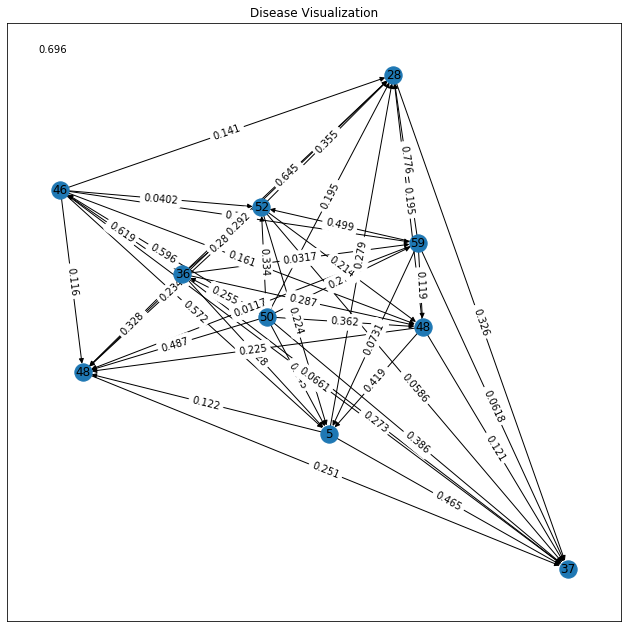

In [71]:
graphdicts1 = []
graphdicts1.append(get_test_graph_data_dicts())

plot_compare_graphs(graphdicts1)


### Loss Function 

In [0]:
def create_loss_ops(target_ops, output_ops):
  """Create supervised loss operations from targets and outputs.
  """
  loss_ops =  tf.reduce_mean(tf.square(tf.subtract(target_ops.nodes,output_ops.nodes)))
  return loss_ops

###  Parameters

#### Set up computational graph

In [0]:
# Set up output_ops
tf.reset_default_graph()

OUTPUT_NODE_SIZE = 2 # node features (must be 2)
OUTPUT_EDGE_SIZE = 100 # irrelevant operator
OUTPUT_GLOBAL_SIZE = 1 # irrelevant operator
graph_network = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=OUTPUT_EDGE_SIZE),
    node_model_fn=lambda: snt.Linear(output_size=OUTPUT_NODE_SIZE),
    global_model_fn=lambda: snt.Linear(output_size=OUTPUT_GLOBAL_SIZE))

# pass in batch of training input graphs

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts[0:-1]) # input batch
target_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts[1::]) # prediction batch
output_ops_tr = graph_network(input_graphs)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
len(graph_dicts[0:-1])

10

In [0]:
len(graph_dicts)

11

In [0]:
len(graph_dicts[1::])

10

In [0]:
input_graphs

GraphsTuple(nodes=<tf.Tensor 'data_dicts_to_graphs_tuple/concat:0' shape=(100, 2) dtype=float32>, edges=<tf.Tensor 'data_dicts_to_graphs_tuple/concat_1:0' shape=(150, 100) dtype=float32>, receivers=<tf.Tensor 'data_dicts_to_graphs_tuple/add:0' shape=(150,) dtype=int32>, senders=<tf.Tensor 'data_dicts_to_graphs_tuple/add_1:0' shape=(150,) dtype=int32>, globals=<tf.Tensor 'data_dicts_to_graphs_tuple/stack:0' shape=(10, 2) dtype=float32>, n_node=<tf.Tensor 'data_dicts_to_graphs_tuple/stack_1:0' shape=(10,) dtype=int32>, n_edge=<tf.Tensor 'data_dicts_to_graphs_tuple/stack_2:0' shape=(10,) dtype=int32>)

In [0]:
for var in graph_network.get_all_variables():
  print(var)

<tf.Variable 'graph_network/edge_block/linear/b:0' shape=(100,) dtype=float32_ref>
<tf.Variable 'graph_network/edge_block/linear/w:0' shape=(106, 100) dtype=float32_ref>
<tf.Variable 'graph_network/global_block/linear/b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'graph_network/global_block/linear/w:0' shape=(104, 1) dtype=float32_ref>
<tf.Variable 'graph_network/node_block/linear/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'graph_network/node_block/linear/w:0' shape=(104, 2) dtype=float32_ref>


In [0]:
input_graphs.nodes.shape == output_ops_tr.nodes.shape 

True

### Training

Now just need to minimize the loss function.

In [0]:

# loss functions, and try to minimize
# how to select a loss function, a target graph, an input graph
# how to minimize the loss function over the graph_network parameters
# i.e how to do training
#target_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

# Training loss.
loss_ops_tr = create_loss_ops(target_graphs, output_ops_tr)
# Training loss across processing steps.
#oss_op_tr = sum(loss_ops_tr) / num_processing_steps_tr


In [0]:
# Optimizer.
learning_rate = 1e-3
optimizer = tf.train.AdamOptimizer(learning_rate)
step_op = optimizer.minimize(loss_ops_tr)
#input_graph_tr = make_all_runnable_in_session(input_graph_tr)

In [0]:
try:
  sess.close()
except NameError:
  pass
sess = tf.Session()
sess.run(tf.global_variables_initializer())
n_steps = 10000
loss_history = []

for i in range(n_steps):
    sess.run(step_op)
    loss_history.append(sess.run(loss_ops_tr))
    #print("Step", i, " \t Loss\t", sess.run(loss_ops_tr))
sess.run(step_op)

#with tf.Session() as sess:

In [0]:
loss_history=np.array(loss_history)

In [0]:
loss_history[0]

672264900000.0

In [0]:
loss_history[-1]

116989.36

In [0]:
for var in graph_network.get_all_variables():
  print(var)
  print(sess.run(var))

<tf.Variable 'graph_network/edge_block/linear/b:0' shape=(100,) dtype=float32_ref>
[ 0.00867309  0.0042782  -0.0039425  -0.00142124  0.01043834 -0.00343247
 -0.01035266 -0.01002817  0.00875631 -0.00363127  0.00442587  0.01036409
 -0.00379137  0.01021878  0.00551978 -0.0042978  -0.00019597 -0.0002067
 -0.00745823  0.00873365 -0.00481667  0.00185903 -0.03155223  0.00114452
 -0.00257798  0.00349632 -0.00328827 -0.01399238 -0.00890145 -0.00395716
 -0.0057321  -0.00015215  0.0075766  -0.0038589   0.03949931  0.02565314
  0.0143097   0.06939901 -0.00959594  0.00501235 -0.00384602  0.00147149
 -0.00462979 -0.00808238 -0.04068067  0.0083306  -0.00253628  0.00237461
 -0.00230444 -0.01521421  0.01150238 -0.00061049 -0.01712026  0.00806271
 -0.00487926 -0.00897562  0.00419123  0.00708021  0.00047635  0.00997437
 -0.00843622 -0.00327098  0.00143083 -0.00955959  0.00071412 -0.00455421
  0.0075956  -0.01006582  0.00726816  0.00301975  0.00420232  0.00162715
  0.01025645 -0.00448658 -0.00279842 -0.01